In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

/home/jan/sc_framework/yes/envs/peakqc/lib/python3.12/site-packages/numpy/_core/getlimits.py:545: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


In [2]:
df = pd.read_csv('../IOBHO.csv', delimiter=';')
df

,Total Count,FLD,muon,FRiP,TSSe,distance-score,n-cells
0,50-5000,NaN,NaN,NaN,NaN,"0,483314154",11924
1,100-5000,NaN,NaN,NaN,NaN,"0,464518604",11717
2,150-5000,NaN,NaN,NaN,NaN,"0,463367856",11477
3,NaN,50-5000,NaN,NaN,NaN,"0,367855773",12460
4,NaN,100-5000,NaN,NaN,NaN,"0,284618335",11530
5,NaN,150-5000,NaN,NaN,NaN,"0,171077867",10476
6,NaN,NaN,"0-0,7",NaN,NaN,"0,762562332",20345
7,NaN,NaN,"0,1-0,7",NaN,NaN,"0,274645186",11032
8,NaN,NaN,"0,7-1,1",NaN,NaN,1,50160
9,NaN,NaN,"1,1-4",NaN,NaN,1,2667


/tmp/ipykernel_680/923302177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['PEAKQC'] = subset_df['FLD'].notna()


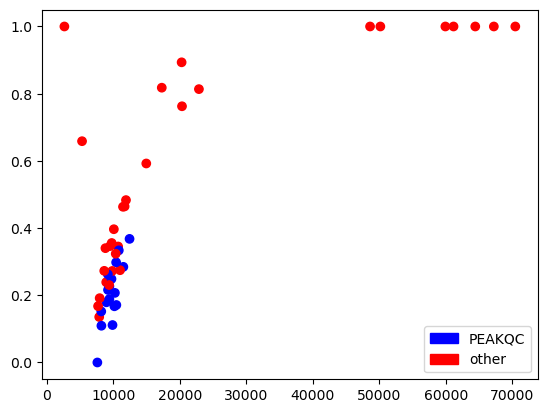

In [3]:
subset_df = df[['FLD', 'distance-score', 'n-cells']]
subset_df['PEAKQC'] = subset_df['FLD'].notna()

# Map boolean values to colors
colors = ['blue' if val else 'red' for val in subset_df['PEAKQC']]

x = df['n-cells']
y = np.round(df['distance-score'].str.replace(',', '.').astype(float),5)

plt.scatter(x,y, c=colors)
# Create custom legend
blue_patch = mpatches.Patch(color='blue', label='PEAKQC')
red_patch = mpatches.Patch(color='red', label='other')
plt.legend(handles=[blue_patch, red_patch])

plt.show()

# Multi 

In [4]:
files = [
    "IOBHO.csv",
    "ADA6L.csv",
    "IOBHN.csv"
]

markers = [".", "o", "v", "*"]
init=True

for i, file in enumerate(files):
    sample = file.split('.')[0]
    sample_col = {sample: markers[i]}
    
    if init:
        df = pd.read_csv(f'../{file}', delimiter=';')
        df['sample'] = sample_col
        init=False
        
    else:
        df_new = pd.read_csv(f'../{file}', delimiter=';')
        df_new['sample'] = sample_col
        df = pd.concat([df, df_new])

/tmp/ipykernel_680/923302177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['PEAKQC'] = subset_df['FLD'].notna()


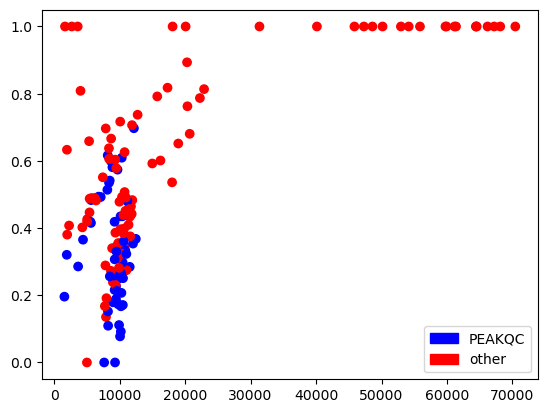

In [5]:
subset_df = df[['FLD', 'distance-score', 'n-cells']]
subset_df['PEAKQC'] = subset_df['FLD'].notna()

# Map boolean values to colors
colors = ['blue' if val else 'red' for val in subset_df['PEAKQC']]

x = df['n-cells']
y = np.round(df['distance-score'].str.replace(',', '.').astype(float),5)

plt.scatter(x,y, c=colors)
# Create custom legend
blue_patch = mpatches.Patch(color='blue', label='PEAKQC')
red_patch = mpatches.Patch(color='red', label='other')
plt.legend(handles=[blue_patch, red_patch])

plt.show()

/tmp/ipykernel_680/609334770.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['PEAKQC'] = subset_df['FLD'].notna()


len x 53
len y 53
len x 48
len y 48
len x 48
len y 48


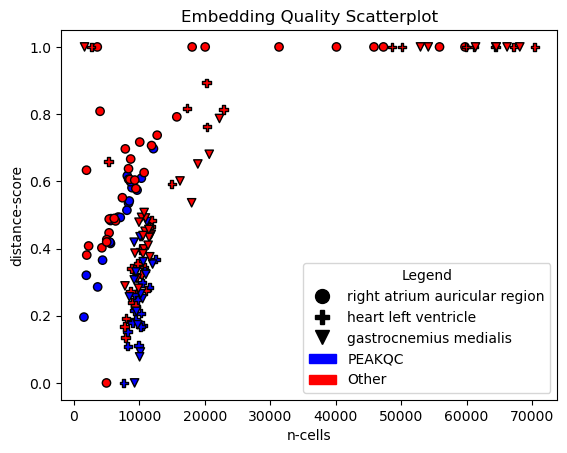

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# ID to Sample
sample_dict = {"IOBHN":"right atrium auricular region", 
               "IOBHO":"heart left ventricle", 
               "ADA6L":"gastrocnemius medialis"}

# Load and prepare the data
files = ["IOBHN.csv", "IOBHO.csv", "ADA6L.csv"]
#files = ["IOBHO.csv", "ADA6L.csv"]
markers = ["o", "P", "v", "*"]

# Combine files into a single DataFrame with a 'sample' column
dfs = []
for i, file in enumerate(files):
    sample = file.split('.')[0]
    df_new = pd.read_csv(f'../{file}', delimiter=';')
    df_new['sample'] = sample_dict[sample]
    df_new['marker'] = markers[i]  # Assign markers
    dfs.append(df_new)

df = pd.concat(dfs)
df = df.reset_index(drop=True)

# Subset the data
subset_df = df[['FLD', 'distance-score', 'n-cells', 'sample', 'marker']]
subset_df['PEAKQC'] = subset_df['FLD'].notna()

# Map boolean values to colors
colors = ['blue' if val else 'red' for val in subset_df['PEAKQC']]

# Extract numeric x and y
x = subset_df['n-cells']
y = np.round(subset_df['distance-score'].str.replace(',', '.').astype(float), 5)

# Plot all data in one call using unique markers for batches
for marker in subset_df['marker'].unique():
    mask = subset_df['marker'] == marker
    len_x = len(x[mask])
    print(f'len x {len_x}')
    len_y = len(y[mask])
    print(f'len y {len_y}')
    plt.scatter(x[mask], y[mask], c=np.array(colors)[mask], marker=marker, label=f"Sample {marker}", edgecolor='k')

# Add legends for markers (batches)
marker_handles = [
    mlines.Line2D([], [], color='black', marker=marker, linestyle='None', markersize=10, label=sample)
    for marker, sample in zip(markers, subset_df['sample'].unique())
]


# Add legend for color
blue_patch = mpatches.Patch(color='blue', label='PEAKQC')
red_patch = mpatches.Patch(color='red', label='Other')

# Combine legends
plt.legend(handles=marker_handles + [blue_patch, red_patch], title="Legend")

# Labels and title
plt.xlabel('n-cells')
plt.ylabel('distance-score')
plt.title('Embedding Quality Scatterplot')

plt.savefig('distance_score_scatter.png', dpi=600)
plt.show()

In [7]:
len(x)-155-48-53

-107

In [8]:
df.reset_index(drop=True)

,Total Count,FLD,muon,FRiP,TSSe,distance-score,n-cells,CUSTOMxCATLAS,CATLASxCUSTOM,sample,marker
0,NaN,50-5000,NaN,NaN,NaN,"0,697127452",12166,"0,5375637","0,998016",right atrium auricular region,o
1,NaN,100-5000,NaN,NaN,NaN,"0,609360219",10316,"0,61962","0,9754311",right atrium auricular region,o
2,NaN,150-5000,NaN,NaN,NaN,"0,534925427",8366,"0,6989","0,892263",right atrium auricular region,o
3,NaN,NaN,NaN,"0,1-2",NaN,1,59770,"0,1068596","0,97466809",right atrium auricular region,o
4,NaN,NaN,NaN,"0,25-2",NaN,1,40132,"0,10458","0,64047001",right atrium auricular region,o
...,...,...,...,...,...,...,...,...,...,...,...
144,NaN,NaN,NaN,"0,4-2",1-1000,"0,651624549",18948,NaN,NaN,gastrocnemius medialis,v
145,150-5000,100-5000,NaN,"0,25-2",NaN,"0,33032491",9490,NaN,NaN,gastrocnemius medialis,v
146,150-5000,100-5000,NaN,NaN,2-1000,"0,21299639",9567,NaN,NaN,gastrocnemius medialis,v
147,150-5000,NaN,"0,1-0,7","0,25-2",NaN,"0,281588448",9889,NaN,NaN,gastrocnemius medialis,v


In [9]:
marker_handles